In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
df['Scaled_Close'] = df_scaled

In [6]:
X = df_scaled[:-1]
y = df_scaled[1:]

In [7]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
model = tf.keras.Sequential([
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(lr=0.001), loss='mse', metrics=['mse'])

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
61/61 - 0s - loss: 0.0359 - mse: 0.0359 - val_loss: 9.7351e-05 - val_mse: 9.7351e-05 - 315ms/epoch - 5ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0095 - mse: 0.0095 - val_loss: 7.7027e-05 - val_mse: 7.7027e-05 - 52ms/epoch - 845us/step
Epoch 3/100
61/61 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 3.6837e-05 - val_mse: 3.6837e-05 - 51ms/epoch - 832us/step
Epoch 4/100
61/61 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 1.1344e-04 - val_mse: 1.1344e-04 - 53ms/epoch - 864us/step
Epoch 5/100
61/61 - 0s - loss: 0.0057 - mse: 0.0057 - val_loss: 1.1438e-04 - val_mse: 1.1438e-04 - 51ms/epoch - 832us/step
Epoch 6/100
61/61 - 0s - loss: 0.0053 - mse: 0.0053 - val_loss: 8.6225e-05 - val_mse: 8.6225e-05 - 50ms/epoch - 819us/step
Epoch 7/100
61/61 - 0s - loss: 0.0049 - mse: 0.0049 - val_loss: 4.8268e-04 - val_mse: 4.8268e-04 - 52ms/epoch - 848us/step
Epoch 8/100
61/61 - 0s - loss: 0.0045 - mse: 0.0045 - val_loss: 5.7250e-05 - val_mse: 5.7250e-05 - 51ms/epoch - 836us/step
Epoch 9/100
61/61

In [10]:
y_pred = model.predict(X_test)

y_pred = np.squeeze(scaler.inverse_transform(y_pred))
y_test = np.squeeze(scaler.inverse_transform(y_test))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}')

19/19 [==============================] - 0s 423us/step
MSE: 175324.9614
MAE: 412.3501
R2: -5.0761


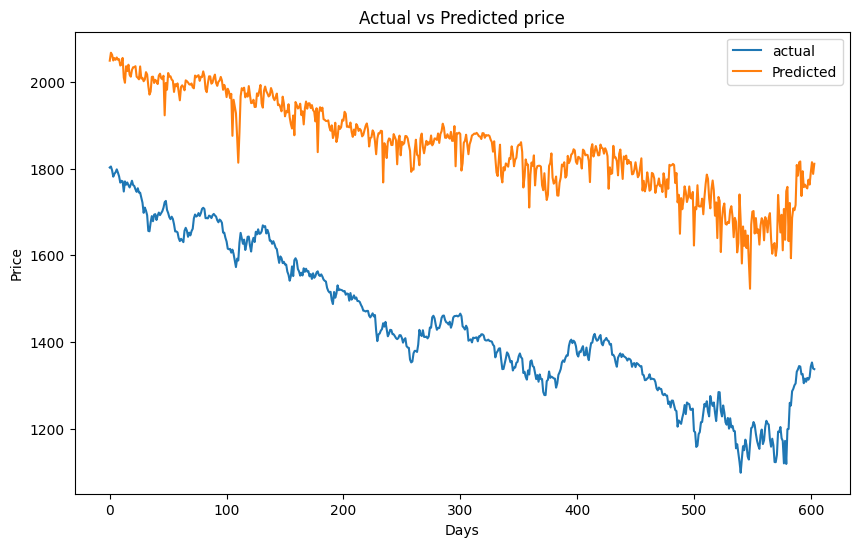

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Actual vs Predicted price')
plt.legend()
plt.show()